# Intro

## Standard modules

In [2]:
import os, sys
import pathlib
import requests

In [3]:
import numpy as np

In [4]:
from tqdm.auto import tqdm, trange

In [5]:
from sentence_transformers import util

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2

plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1

In [7]:
from sklearn.decomposition import PCA

In [8]:
import seaborn

In [9]:
import pymannkendall as mk

In [10]:
from scipy.spatial.distance import cosine

In [11]:
import requests
import re

In [12]:
import wikipedia

## Personal modules

In [13]:
from toolbox.updater import time_is_now

In [14]:
from file2text import file2text

In [15]:
from first_rough_cleaning import first_text_cleaner

In [16]:
from file_handler import *

In [17]:
from jina4lote import jina4lote

/home/sarawalk/sdgs_py38/lib/python3.8/site-packages/torch/cuda/__init__.py:118: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10020). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


## Folders

In [18]:
VECTOR_FOLDER='./NewProcessedData/vectors/'

In [19]:
BENCHMARK_FOLDER='./NewProcessedData/benchmarks/'

In [20]:
PCA_CENTR_VECTOR_FOLDER='./NewProcessedData/pca_centr_vectors/'

## Witten's vector

In [21]:
wittenvecfile=[file for file in os.listdir(BENCHMARK_FOLDER) if file.startswith('Witten') and file.endswith('.txt')][0]

In [22]:
wittenvec=np.genfromtxt(BENCHMARK_FOLDER+wittenvecfile)

## Load vectors

In [23]:
vecfiles=os.listdir(PCA_CENTR_VECTOR_FOLDER)

In [24]:
vecfiles.sort()

### Goals' vectors

#### Load files

In [25]:
goalvecfiles=[vecfile for vecfile in vecfiles if vecfile.startswith('Goal')]

In [26]:
goalvecfiles.sort()

In [27]:
goalvecfiles

['Goal-01-Fast-Facts.txt',
 'Goal-02-Fast-Facts.txt',
 'Goal-03-Fast-Facts.txt',
 'Goal-04-Fast-Facts.txt',
 'Goal-05-Fast-Facts.txt',
 'Goal-06-Fast-Facts.txt',
 'Goal-07-Fast-Facts.txt',
 'Goal-08-Fast-Facts.txt',
 'Goal-09-Fast-Facts.txt',
 'Goal-10-Fast-Facts.txt',
 'Goal-11_Fast-Facts.txt',
 'Goal-12_Fast-Facts.txt',
 'Goal-13_Fast-Facts.txt',
 'Goal-14_Fast-Facts.txt',
 'Goal-15-Fast-Facts.txt',
 'Goal-16-Fast-Facts.txt',
 'Goal-17-Fast-Facts.txt',
 'Goal-Fast-Facts.txt']

In [28]:
goalvecs=[np.genfromtxt(PCA_CENTR_VECTOR_FOLDER+goalvecfile) for goalvecfile in goalvecfiles]

### Reports' vectors

In [29]:
reports_files=[vecfile for vecfile in vecfiles if vecfile[:4].isnumeric()]

In [30]:
reports_files.sort()

In [31]:
years, k_y=np.unique([rf[:4] for rf in reports_files], return_counts=True)

In [32]:
np.vstack((years, k_y)).T

array([['2015', '40'],
       ['2016', '44'],
       ['2017', '51'],
       ['2018', '56'],
       ['2019', '67'],
       ['2020', '69'],
       ['2021', '76'],
       ['2022', '80'],
       ['2023', '90']], dtype='<U21')

In [33]:
vectors=np.zeros(len(reports_files), dtype=[('year', 'i4'), ('sector', 'U2'), ('company', 'U100'), ('vector', object)])

In [34]:
for i_rf, reports_file in enumerate(reports_files):
    # info from the filename
    splitted_filename=reports_file.split('_')
    
    year=int(splitted_filename[0])
    sector=splitted_filename[1]
    if splitted_filename[-1]=='PLC.txt':
        company='_'.join(splitted_filename[2:-1])
    else:
        company='_'.join(splitted_filename[2:])
        company=company.replace('.txt', '')
    company=company.lower()
    # get the vector
    vector=np.genfromtxt(PCA_CENTR_VECTOR_FOLDER+reports_file)
    
    # organize data
    vectors[i_rf]['year']=year
    vectors[i_rf]['sector']=sector
    vectors[i_rf]['company']=company
    vectors[i_rf]['vector']=vector

## Sector helper

In [35]:
rtf_files=os.listdir('./rtf')
rtf_files.sort()

In [36]:
sec_helper={}
for file in rtf_files:
    splitted_name=file.split('_')
    if splitted_name[0].isnumeric():
        if splitted_name[0] not in sec_helper.keys():
            sec_helper[splitted_name[0].zfill(2)]=splitted_name[1]

In [37]:
sec_helper

{'10': 'Telecommunications',
 '11': 'Utilities',
 '01': 'Basic Materials',
 '02': 'Consumer Discretionary',
 '03': 'Consumer Staples',
 '04': 'Energy',
 '05': 'Financials',
 '06': 'Health Care',
 '07': 'Industrials',
 '08': 'Real Estate',
 '09': 'Technology'}

## SDG helper

In [38]:
sdg_helper={'01':'No Poverty', 
 '02': 'Zero hunger', 
 '03': 'Good health and well-being', 
 '04': 'Quality education',
 '05': 'Gender equality',
 '06': 'Clean water and sanitation',
 '07': 'Affordable and clean energy',
 '08': 'Decent work and economic growth',
 '09': 'Industry, Innovation, Technology and Infrastructure',
 '10': 'Reduced inequality',
 '11': 'Sustainable cities and communities',
 '12': 'Responsible consumption and production',
 '13': 'Climate action',
 '14': 'Life below water',
 '15': 'Life on land',
 '16': 'Peace, justice and strong institutions',
 '17': 'Partnerships for the goals'
}

# The Wikipedia benchmark

## Function

### get_wikipedia_texts: DeepSeek + Fabio

In [39]:
USER_AGENT = "YourProject/1.0 (your@email.com)"  # Obbligatorio per policy API

In [64]:
def get_wikipedia_texts(rnlimit=100):
    base_url = "https://en.wikipedia.org/w/api.php"
    texts = []
    
    # Step 1: Ottenere 4000 titoli casuali
    params_random = {
        "action": "query",
        "format": "json",
        "list": "random",
        "rnnamespace": 0,
        "rnlimit": rnlimit,
        "rnminsize": 15000,  # Filtro lunghezza minima: funziona il giusto, ma meglio di un calcio nei denti
        "rnmaxsize": 17000,   # Filtro lunghezza massima: funziona il giusto, ma meglio di un calcio nei denti
        "rnfilterredir": "nonredirects"
    }
    response_random = requests.get(base_url, params=params_random, headers={"User-Agent": USER_AGENT})
    titles = [item['title'] for item in response_random.json()['query']['random']]
    
    # Step 2: Scaricare contenuti completi via wikipedia's module
    texts
    for title in titles:
        try:
            tim=wikipedia.page(title)
            texts.append(first_text_cleaner(tim.content).replace('\'', "'"))
        except:
            continue
    return titles, texts

## How long have to be the benchmark's texts?

In [41]:
pdfs=[file for file in os.listdir(BENCHMARK_FOLDER) if file.endswith('.pdf')]
pdfs.sort()

In [42]:
pdfs

['Goal-10-Fast-Facts.pdf',
 'Goal-11_Fast-Facts.pdf',
 'Goal-12_Fast-Facts.pdf',
 'Goal-13_Fast-Facts.pdf',
 'Goal-14_Fast-Facts.pdf',
 'Goal-15-Fast-Facts.pdf',
 'Goal-16-Fast-Facts.pdf',
 'Goal-17-Fast-Facts.pdf',
 'Goal-1_Fast-Facts.pdf',
 'Goal-2_Fast-Facts.pdf',
 'Goal-3_Fast-Facts.pdf',
 'Goal-4_Fast-Facts.pdf',
 'Goal-5_Fast-Facts.pdf',
 'Goal-6_Fast-Facts.pdf',
 'Goal-7_Fast-Facts.pdf',
 'Goal-8_Fast-Facts.pdf',
 'Goal-9-Fast-Facts.pdf',
 'Goal-Fast-Facts.pdf',
 'Witten_A_Mini_Introduction_To_Information_Theory.pdf']

In [43]:
l_benchs=[]
for i_pdf, pdf in enumerate(tqdm(pdfs)):
    # vector file name
    vecfile=pdf.replace('.pdf', '.txt')
    # get the md file name
    file_name_md=pdf.replace('.pdf', '.md')
    # read the md file
    with open(BENCHMARK_FOLDER+file_name_md, 'r') as f:
        markdown_string = f.read()
    l_benchs.append(len(first_text_cleaner(markdown_string)))

  0%|          | 0/19 [00:00<?, ?it/s]

In [44]:
min(l_benchs), max(l_benchs[:-2])

(3533, 4639)

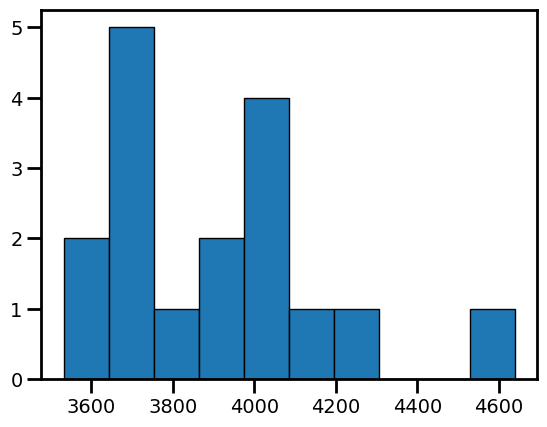

In [45]:
plt.hist(l_benchs[:-2], edgecolor='black')
plt.show()

In [51]:
min_lenght=3000
max_lenght=5000

## Run

Let it run in bunches:

In [53]:
th=4000

In [56]:
titles=[]
texts=[]
_round=0
while len(titles)<th:
    print(f'round={_round:4}, len(titles)={len(titles):4}',end='\r')
    _titles, _texts = get_wikipedia_texts()
    for i_t, _text in enumerate(_texts): 
        if len(_text)>=min_lenght and len(_text)<=max_lenght:
            texts.append(_text)
            titles.append(_titles[i_t])
    _round+=1


KeyboardInterrupt



In [ ]:
_titles, _texts = get_wikipedia_texts(100)

/home/sarawalk/sdgs_py38/lib/python3.8/site-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /home/sarawalk/sdgs_py38/lib/python3.8/site-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


In [ ]:
len([_text for _text in _texts if len(_text)>=max_lenght])

In [ ]:
len([_text for _text in _texts if len(_text)<=min_lenght])

# Similarity validation

In [41]:
years=years.astype('i4')

## Functions

### p-value calculator

In [65]:
def p_value_cos_sim(orig_vec, benchmark_vec, n_shuffle=None):
    if n_shuffle is None:
        n_shuffle=len(orig_vec)**2
    obs_cos_sim=float(util.cos_sim(benchmark_vec, orig_vec))
    sample_cos_sim=np.zeros(n_shuffle)
    for _ in range(n_shuffle):
        _aux=orig_vec.copy()
        np.random.shuffle(_aux)
        sample_cos_sim[_]=float(util.cos_sim(benchmark_vec, _aux))
    return np.sum(sample_cos_sim>=obs_cos_sim)/n_shuffle

### FDR

In [77]:
def fdr_validation(p_value, alpha):
    _aux=np.sort(p_value)
    l_p=len(p_value)
    _selection=_aux<=np.arange(1, l_p+1)*alpha/l_p
    if np.sum(_selection)==0:
        return 0.
    else:
        return _aux[_selection][-1]

## Global

In [76]:
selection_2023=vectors[vectors['year']==2023]
p_vals_2023=np.zeros(len(selection_2023))
for i_vec, vec in enumerate(tqdm(selection_2023)):
    p_vals_2023[i_vec]=p_value_cos_sim(vec['vector'],goalvecs[-1])

  0%|          | 0/90 [00:00<?, ?it/s]

### 2023

In [81]:
np.sort(p_vals_2023)

array([0.00907029, 0.01058201, 0.01385739, 0.01461325, 0.01788864,
       0.02973041, 0.05593348, 0.05920887, 0.06021668, 0.07054674,
       0.07256236, 0.08742756, 0.10128496, 0.11312673, 0.12572436,
       0.12673217, 0.13454271, 0.13932981, 0.14512472, 0.15142353,
       0.15520282, 0.16553288, 0.16981607, 0.17863442, 0.18543714,
       0.19677501, 0.24212648, 0.24666163, 0.25547997, 0.26505417,
       0.26530612, 0.27160494, 0.27614009, 0.28369866, 0.29831192,
       0.30083144, 0.31393298, 0.3303099 , 0.34215168, 0.38221214,
       0.38347191, 0.38573948, 0.39506173, 0.39531368, 0.39707735,
       0.40891912, 0.41320232, 0.41395818, 0.4159738 , 0.43184681,
       0.43537415, 0.44016125, 0.51045603, 0.52305367, 0.526581  ,
       0.52935248, 0.56764928, 0.57621567, 0.58427816, 0.5930965 ,
       0.62585034, 0.64600655, 0.64600655, 0.67850844, 0.70471151,
       0.70647518, 0.70899471, 0.74452003, 0.74477198, 0.74754346,
       0.75837743, 0.7654321 , 0.76694381, 0.78306878, 0.78684

In [78]:
fdr_validation(p_vals_2023, .05)

0.0

Ah, bene.

In [88]:
np.sum(p_vals_2023<=.05)

6

### All years

In [90]:
p_value_year={}
for year in tqdm(years):
    selection_year=vectors[vectors['year']==year]
    p_value_year[year]={}
    p_value_year[year]['p-vals']=np.zeros(len(selection_year))
    for i_vec, vec in enumerate(tqdm(selection_year)):
        p_value_year[year]['p-vals'][i_vec]=p_value_cos_sim(vec['vector'],goalvecs[-1])
    p_value_year[year]['fdt_th']=fdr_validation(p_value_year[year]['p-vals'], .05)

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/67 [00:00<?, ?it/s]

  0%|          | 0/69 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

In [91]:
[p_value_year[year]['fdt_th'] for year in years]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]